In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

width = 17
height = 5
matplotlib.rcParams['figure.figsize'] = [width, height]
matplotlib.rcParams['lines.markersize'] = 0.5
matplotlib.rcParams['scatter.edgecolors'] = "black"

In [3]:
n = 1000
batch_n = 10
generator = np.random.RandomState(42)

$x_t = px_{t-1} + \xi_t$


В ```noise_maker``` передается функция $\xi_t = N(\sin(wt), 0.3)$

In [4]:
def ar(p, arr, noise_maker, to_add = 10000):
    new_vals = np.array(arr)
    new_vals = np.append(new_vals, [0] * to_add)
    pos = 1
    for i in range(to_add):
        noise = noise_maker(i)
        new_vals[pos + i] = p * new_vals[pos + i - 1] + noise
    return new_vals

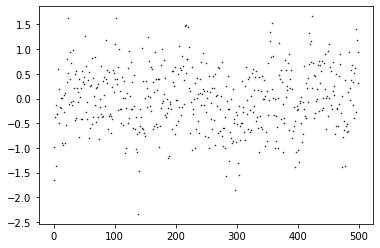

In [5]:
n_to_plot = 500
w = 10
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.8, generator.normal(0.5, 0.3), f1, 5000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

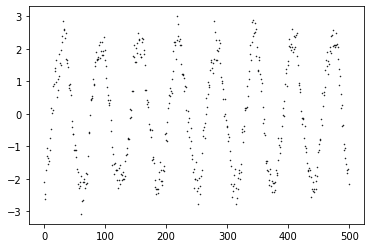

In [6]:
n_to_plot = 500
w = 0.1
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

$\xi_t = N(\sin(0.1t) + \sin(0.2t), 0.3)$

$p = 0.9$

$x_t = 0.9x_{t-1} + \xi_t$

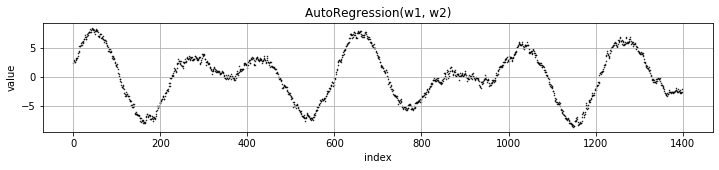

In [20]:
n_to_plot = 1400
w1 = np.pi * 2 / 200
w2 = np.pi * 2 / 317
f1 = lambda t: generator.normal(np.sin(w1 * t) + np.sin(w2 * t), 0.3)
to_plot = ar(0.75, generator.normal(100, 6), f1, 1000000)[-n_to_plot:]
plt.title('AutoRegression(w1, w2)')
plt.xlabel('index')
plt.ylabel('value')
plt.scatter(np.arange(n_to_plot), to_plot)

$\xi_t = N(\sin(0.08t), 0.3)$

$p = 0.55$

$x_t = 0.55x_{t-1} + \xi_t$

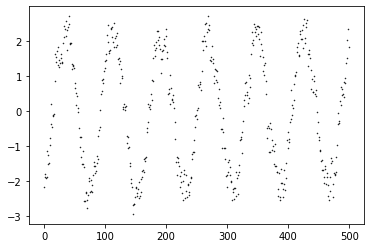

In [8]:
n_to_plot = 500
w = 0.08
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

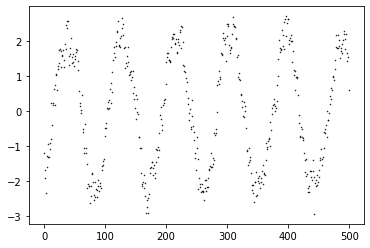

In [9]:
n_to_plot = 500
w = 0.07
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

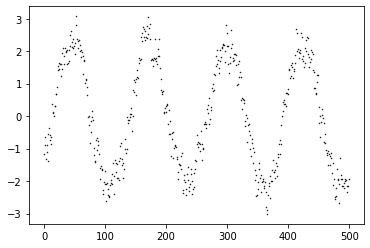

In [10]:
n_to_plot = 500
w = 0.05
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.55, 100 * generator.normal(100, 6), f1, 500000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

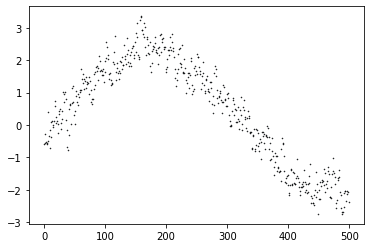

In [11]:
n_to_plot = 500
w = 0.01
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

In [12]:
def mfft(a ,draw=False):
    plt.rcParams['axes.grid'] = True
    plt.tight_layout()
    A = np.fft.rfft(a)
    N = len(a)
    if (draw):
        plt.rcParams['axes.grid'] = True
        fig, ax = plt.subplots(2, figsize=(6,4), dpi=150)
        plt.tight_layout()
        n = np.arange(len(a))
        
        ax[0].plot(n, a, '.-')
        ax[0].set_title('$a[n]$')
        ax[1].set_xlim(0, 170)
        ax[1].set_title('$A$')
        #ax[1].plot(n[0 : (N // 2 + 1)], A.real, '-', label='real')
        #ax[1].plot(n[0 : (N // 2 + 1)], A.imag, '-', label='imag')
        ax[1].plot(n[0 : (N // 2 + 1)], np.abs(A), '-')
        #ax[1].legend(loc=2, bbox_to_anchor=(1, 1))
        
    return np.abs(A)

Посмотрим, как меняются амплитуды и частоты, которые находит FFT, при изменении параметров авторегрессии.

2 0.008975979010256551


<Figure size 432x288 with 0 Axes>

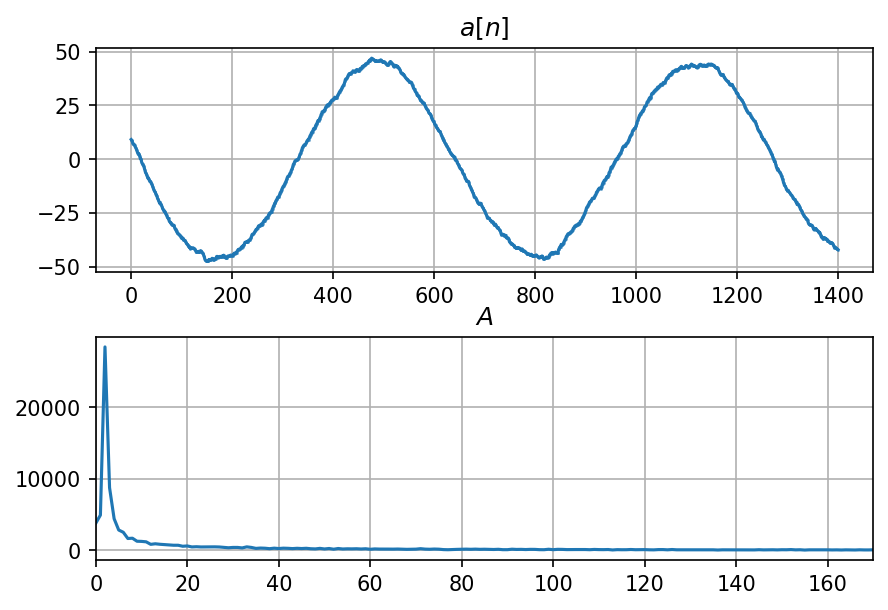

In [13]:
n_to_plot = 1400
w = 0.01
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.98, 100 * generator.normal(100, 6), f1, 500000)[-n_to_plot:]
#plt.scatter(np.arange(n_to_plot), to_plot)
Abs = mfft(to_plot, True)
print(np.argmax(Abs), 2 * np.pi * np.argmax(Abs) / n_to_plot)

### Изучаение зависимости амплитуды от параметра p авторегресии
Построим график зависимости  $y = A(p)$. Амплитуду будем определять как максимум массива, возвращаемого функцией ```mfft```. Пока что ограничимся зависимостью шума лишь от одной частоты $w$.

In [14]:
def get_amplitude(p):
    # fixed parameters
    w = 0.1 # frequency
    n_points = 1400 # number of points to analyze in FFT
    # generate sequence
    noiser = lambda t: np.sin(w * t)
    data = ar(p, generator.normal(2, 0.2), noiser, n_points)
    # calculate FFT and return major amplitude
    return max(mfft(data, False))

In [15]:
def draw_dependency():
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.figsize'] = (12, 2)
    #fig = plt.subplots(1)[0]
    ps = np.linspace(0, 1, 100)
    res = [get_amplitude(p) for p in ps]
    plt.scatter(ps, res)
    plt.xlabel('p')
    plt.ylabel('Amplitude')
    plt.gca().set(ylim=(0,10000))
    plt.show()

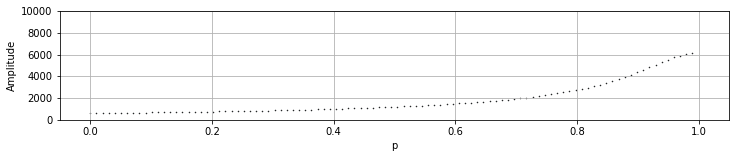

In [16]:
draw_dependency()